# Musical Instruments Category - Data Exploration

**Category**: Musical Instruments  

## 1. Import Libraries

In [2]:
import os
from pathlib import Path
import warnings

import rootutils


rootutils.setup_root(Path.cwd(), indicator=".project-root", pythonpath=True)

ROOT_DIR = Path(os.environ.get("PROJECT_ROOT", Path.cwd()))
print(ROOT_DIR)

/home/max/projects/nulp/amazon-reviews-analysis


In [3]:
import os
from pathlib import Path
import warnings

import rootutils


rootutils.setup_root(Path.cwd(), indicator=".project-root", pythonpath=True)

ROOT_DIR = Path(os.environ.get("PROJECT_ROOT", Path.cwd()))

REVIEWS_PATH = ROOT_DIR / "data/raw/review_categories/Musical_Instruments.jsonl"
METADATA_PATH = ROOT_DIR / "data/raw/meta_categories/meta_Musical_Instruments.jsonl"

warnings.filterwarnings("ignore")

## Initialize Spark

In [4]:
from amazon_reviews_analysis.utils import build_spark


spark = build_spark()

print("✓ Spark Session created successfully!")
print(f"Spark Version: {spark.version}")
print(f"Spark App Name: {spark.sparkContext.appName}")
print(f"Spark Master: {spark.sparkContext.master}")
print(f"Spark UI: {spark.sparkContext.uiWebUrl}")

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/12 12:42:29 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


✓ Spark Session created successfully!
Spark Version: 4.0.1
Spark App Name: AmazonReviews
Spark Master: local[*]
Spark UI: http://IdeaPad-Pro-5-14AHP9:4040


---

# PART A: METADATA

## Load Metadata

In [5]:
from amazon_reviews_analysis.utils import load_metadata


print(f"📂 Metadata: {METADATA_PATH}")

metadata_df = load_metadata(spark, METADATA_PATH)
print(f"Total records: {metadata_df.count():,}")

📂 Metadata: /home/max/projects/nulp/amazon-reviews-analysis/data/raw/meta_categories/meta_Musical_Instruments.jsonl


Total records: 213,593


## Schema & Structure

In [6]:
print("SCHEMA")
print("=" * 80)
metadata_df.printSchema()

print(f"\nColumns: {len(metadata_df.columns)}")
for idx, col_name in enumerate(metadata_df.columns, 1):
    print(f"{idx:2d}. {col_name}")

SCHEMA
root
 |-- author: struct (nullable = true)
 |    |-- about: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- avatar: string (nullable = true)
 |    |-- name: string (nullable = true)
 |-- average_rating: double (nullable = true)
 |-- bought_together: string (nullable = true)
 |-- categories: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- description: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- details: map (nullable = true)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)
 |-- features: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- images: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- hi_res: string (nullable = true)
 |    |    |-- large: string (nullable = true)
 |    |    |-- thumb: string (nullable = true)
 |    |    |-- variant: string (nullable = true)
 |-- main_category: string (

## Sample Data

In [7]:
metadata_df.show(5, truncate=50)

+------+--------------+---------------+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+-------------------+-----------+-----+-------------+---------+--------+--------------------------------------------------+--------------------------------------------------+
|author|average_rating|bought_together|                                        categories|                                       description|                                           details|                                          features|                                            images|      main_category|parent_asin|price|rating_number|    store|subtitle|                                             title|                                            videos|
+------+--------------+---------------+-------------------------

The table describes the range of musical instruments available on Amazon, including ratings, prices, specifications, brands, images, etc.

---

# PART B: REVIEWS

## Load Reviews

In [8]:
from amazon_reviews_analysis.utils import load_reviews

print(f"📂 Reviews: {REVIEWS_PATH}")

reviews_df = load_reviews(spark, REVIEWS_PATH)
print(f"Total records: {reviews_df.count():,}")

📂 Reviews: /home/max/projects/nulp/amazon-reviews-analysis/data/raw/review_categories/Musical_Instruments.jsonl
Total records: 3,017,439


## Schema & Structure

In [9]:
print("SCHEMA")
print("=" * 80)
reviews_df.printSchema()

print(f"\nColumns: {len(reviews_df.columns)}")
for idx, col_name in enumerate(reviews_df.columns, 1):
    print(f"{idx:2d}. {col_name}")

SCHEMA
root
 |-- asin: string (nullable = true)
 |-- helpful_vote: long (nullable = true)
 |-- images: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- attachment_type: string (nullable = true)
 |    |    |-- large_image_url: string (nullable = true)
 |    |    |-- medium_image_url: string (nullable = true)
 |    |    |-- small_image_url: string (nullable = true)
 |-- parent_asin: string (nullable = true)
 |-- rating: double (nullable = true)
 |-- text: string (nullable = true)
 |-- timestamp: long (nullable = true)
 |-- title: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- verified_purchase: boolean (nullable = true)


Columns: 10
 1. asin
 2. helpful_vote
 3. images
 4. parent_asin
 5. rating
 6. text
 7. timestamp
 8. title
 9. user_id
10. verified_purchase


## Sample Data

In [10]:
reviews_df.show(5, truncate=50)

+----------+------------+------+-----------+------+--------------------------------------------------+-------------+------------------------------------------------+----------------------------+-----------------+
|      asin|helpful_vote|images|parent_asin|rating|                                              text|    timestamp|                                           title|                     user_id|verified_purchase|
+----------+------------+------+-----------+------+--------------------------------------------------+-------------+------------------------------------------------+----------------------------+-----------------+
|B003LPTAYI|           0|    []| B003LPTAYI|   5.0|Great headphones, comfortable and sound is good...|1452650586000|                                      Five Stars|AGKASBHYZPGTEPO6LWZPVJWB2BVA|             true|
|B00723436A|           2|    []| B06XP6TDVY|   3.0|I like the piano.. but the sustain pedal failed...|1558567365290|nice sound.  pedal failed after 

The table contains information about user experiences, ratings, and comments about musical instruments. This data can be used to analyze sentiment, identify popular products, and correlate ratings with review text.

# DATA EXPLORATION

### MISSING VALUES

In [11]:
from pyspark.sql.functions import col, sum, when, size

print("=== METADATA: Missing Values Analysis ===")
total_meta = metadata_df.count()

# % missed data in each column
nulls = metadata_df.select([
    (sum(when(col(c).isNull(), 1).otherwise(0)) / total_meta).alias(c)
    for c in metadata_df.columns
])

nulls.show()

metadata_df.select([
    (sum(when(size(col(c)) == 0, 1).otherwise(0)) / total_meta).alias(f"{c}_empty")
    for c in ["categories", "images", "description", "features"]
]).show()

=== METADATA: Missing Values Analysis ===


+------------------+--------------+---------------+----------+-----------+-------+--------+------+--------------------+-----------+------------------+-------------+--------------------+------------------+-----+------+
|            author|average_rating|bought_together|categories|description|details|features|images|       main_category|parent_asin|             price|rating_number|               store|          subtitle|title|videos|
+------------------+--------------+---------------+----------+-----------+-------+--------+------+--------------------+-----------+------------------+-------------+--------------------+------------------+-----+------+
|0.9994335020342427|           0.0|            1.0|       0.0|        0.0|    0.0|     0.0|   0.0|0.015880670246684114|        0.0|0.6024401548739893|          0.0|0.016648485671346906|0.9984175511369755|  0.0|   0.0|
+------------------+--------------+---------------+----------+-----------+-------+--------+------+--------------------+---------

METADATA: metadata_df table has a significant number of gaps, especially in columns related to content (description, features, categories) and price.

In [12]:
print("=== REVIEWS: Missing Values Analysis ===")

total_reviews = reviews_df.count()

nulls = reviews_df.select([
    (sum(when(col(c).isNull(), 1).otherwise(0)) / total_reviews).alias(c)
    for c in reviews_df.columns
])
nulls.show()

=== REVIEWS: Missing Values Analysis ===


+----+------------+------+-----------+------+----+---------+-----+-------+-----------------+
|asin|helpful_vote|images|parent_asin|rating|text|timestamp|title|user_id|verified_purchase|
+----+------------+------+-----------+------+----+---------+-----+-------+-----------------+
| 0.0|         0.0|   0.0|        0.0|   0.0| 0.0|      0.0|  0.0|    0.0|              0.0|
+----+------------+------+-----------+------+----+---------+-----+-------+-----------------+



REVIEWS: reviews_df has high data quality — all fields are filled in. This means the data can be used for further analysis without any problems.

### BASIC STATISTICS

In [13]:
metadata_df.describe().show()

25/11/12 12:42:39 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+---------------+--------------+--------------------+------------------+-----------------+--------------------+--------------------+--------------------+
|summary|    average_rating|bought_together| main_category|         parent_asin|             price|    rating_number|               store|            subtitle|               title|
+-------+------------------+---------------+--------------+--------------------+------------------+-----------------+--------------------+--------------------+--------------------+
|  count|            213593|              0|        210201|              213593|             84916|           213593|              210037|                 338|              213593|
|   mean| 4.186434480530713|           NULL|          NULL|1.7556887014216523E9|127.70641862437479|85.04842387156883|7.272727272727273E87|                NULL|  3645879.1818181816|
| stddev|0.7968016092730622|           NULL|          NULL| 2.034893154331802E9|   314.53495401

METADATA: metadata_df shows that the products are mostly positively rated, but the spread in prices and number of ratings is large. The price ranges indicate the presence of both budget and premium instruments.

In [14]:
reviews_df.describe().show()

+-------+--------------------+------------------+--------------------+------------------+--------------------+--------------------+------------------+--------------------+
|summary|                asin|      helpful_vote|         parent_asin|            rating|                text|           timestamp|             title|             user_id|
+-------+--------------------+------------------+--------------------+------------------+--------------------+--------------------+------------------+--------------------+
|  count|             3017439|           3017439|             3017439|           3017439|             3017439|             3017439|           3017439|             3017439|
|   mean|1.3764444481463904E9|1.1371795751297706|1.3043457341997557E9| 4.255534246094122|  1038671.9813084112|1.535039104467013...|34515.094420600864|                NULL|
| stddev| 1.324467488883853E9|10.026837813346503|1.1137710773919144E9|1.2781070691862715|1.0741492233528752E7|9.750218012255315E10|  524621.

REVIEWS: Most users leave positive reviews, but there are a number of low ratings. The review texts are of varying lengths, sometimes even emojis.

The average rating for both products and reviews is ≈ 4, meaning positive ratings prevail.

The data varies by price, popularity, and publication period.

### EXPLORATION OF SOME COLUMNS

In [15]:
reviews_df.groupBy("rating").count().orderBy("rating").show()

+------+-------+
|rating|  count|
+------+-------+
|   1.0| 264352|
|   2.0| 131441|
|   3.0| 197131|
|   4.0| 400387|
|   5.0|2024128|
+------+-------+



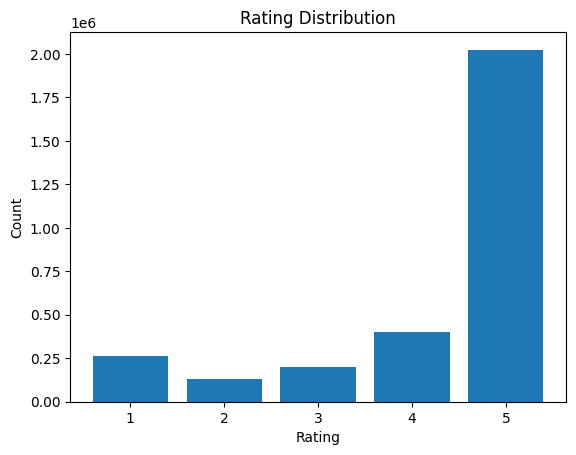

In [16]:
rating_counts = (
    reviews_df.groupBy("rating")
    .count()
    .orderBy("rating")
)

pdf = rating_counts.toPandas()

import matplotlib.pyplot as plt

plt.figure()
plt.bar(pdf["rating"], pdf["count"])
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [17]:
reviews_df.agg({'rating': 'avg'}).show()

+-----------------+
|      avg(rating)|
+-----------------+
|4.255534246094122|
+-----------------+



Most users give the highest rating — 5.0.

This indicates either general user satisfaction or a bias in ratings (people are more likely to leave reviews when they are very satisfied).

The fewest reviews have a rating of 2.0. Low ratings are less common, which is also a typical effect — dissatisfied users sometimes do not leave a review.

The distribution is asymmetric — clearly biased towards high ratings.

In [18]:
reviews_df.groupBy("verified_purchase").count().show()

+-----------------+-------+
|verified_purchase|  count|
+-----------------+-------+
|             true|2780515|
|            false| 236924|
+-----------------+-------+



Most reviews (≈90%) are verified by purchase, i.e. left by users who actually purchased the product.

Only about 10% are unverified, which could mean:

1. the user left the review without purchasing through another platform;

2. or potentially less reliable reviews (bots, advertising, subjective opinions).

In [19]:
from pyspark.sql.functions import length

reviews_df.select(length("text").alias("text_length")).describe().show() # description of review text lengths

+-------+------------------+
|summary|       text_length|
+-------+------------------+
|  count|           3017439|
|   mean|238.59247394893484|
| stddev| 395.9662037066233|
|    min|                 0|
|    max|             32962|
+-------+------------------+



Average length ~173 characters → most users leave short, concise comments

Large standard deviation (~247) → text length varies greatly - there are both very short and extremely long reviews.

In [20]:
reviews_df.groupBy("user_id", "asin", "timestamp").count().orderBy("count", ascending=False).show(5) # potential duplicate or suspicious entries

+--------------------+----------+-------------+-----+
|             user_id|      asin|    timestamp|count|
+--------------------+----------+-------------+-----+
|AGALPU5ARZEK75CGK...|B009YC8JJE|1549413680817|   27|
|AHL67IRKKK44Z54JP...|B00VK4YXF8|1684530407472|    9|
|AG4SCNJCEYFBN43VX...|B0002GWNMU|1582166575369|    9|
|AHK5PAWXMBNYVC6Z4...|B00GYCDZF0|1504726513809|    9|
|AGEGJU4BMMHYHSU2D...|B00CYRJ9WC|1412881955000|    9|
+--------------------+----------+-------------+-----+
only showing top 5 rows


The same user may have left several identical entries about the same product at the same time.

In [21]:
from pyspark.sql.functions import count

duplicates = reviews_df.groupBy("user_id", "asin", "timestamp").count().filter("count > 1")
print(duplicates.count())

28240


In [22]:
from pyspark.sql.functions import approx_count_distinct

reviews_df.select(
    approx_count_distinct("asin").alias("unique_products"),
    approx_count_distinct("user_id").alias("unique_users")
).show()

+---------------+------------+
|unique_products|unique_users|
+---------------+------------+
|         241562|     1733419|
+---------------+------------+



Comparing to the total number of reviews, we can estimate the average reviews per user and per product.

In [23]:
from pyspark.sql.functions import col, when, regexp_replace, expr

# 1) Clean & normalize the string price, then try_cast to DOUBLE
#   - remove currency symbols and spaces
#   - handle European "14,38" by converting single-comma decimals to dots
clean = regexp_replace(col("price"), r"[^0-9.,-]", "")  # keep digits . , -
norm = when(
    (clean.contains(",")) & (~clean.contains(".")),  # likely decimal comma
    regexp_replace(clean, ",", ".")
).otherwise(clean)

with_prices = metadata_df.withColumn("price_num", expr("try_cast(%s as double)" % norm._jc.toString()))

# 2) Use the numeric column everywhere
print("=== Price Analysis ===")
with_prices.filter(col("price_num").isNotNull()) \
    .select("price_num", "title", "average_rating") \
    .orderBy(col("price_num").desc()) \
    .show(10, truncate=50)

from pyspark.sql.functions import when

price_ranges = with_prices.filter(col("price_num").isNotNull()) \
    .withColumn(
        "price_range",
        when(col("price_num") < 50, "Budget (<$50)")
        .when(col("price_num") < 200, "Mid ($50-200)")
        .when(col("price_num") < 500, "Premium ($200-500)")
        .otherwise("Luxury (>$500)")
    ) \
    .groupBy("price_range").count() \
    .orderBy(col("count").desc())

price_ranges.show()


=== Price Analysis ===
+---------+--------------------------------------------------+--------------+
|price_num|                                             title|average_rating|
+---------+--------------------------------------------------+--------------+
|  18990.0|Rane Professionl 24 Bit DJ Mixer w/Premium pe (...|           5.0|
| 15499.95|  Sony C-800G Large-Diaphragm Condenser Microphone|           4.0|
|   9699.0|                               Martin D-45 Natural|           3.5|
|  9235.75|               Conn Alto Horn, Nickel,Silver (8DS)|           5.0|
|   9182.4|                           Eastman EBC832S CC Tuba|           5.0|
|   6998.0|                Pioneer DJ DJ Controller (DDJ-RZX)|           2.8|
|   6995.0|Levante LV-SB5105 Bb Bass Saxophone with Light ...|           3.6|
|   6766.0|                LE BLANC Alto Horn, Nickel (L7182)|           4.5|
|   6433.0|Selmer Paris Series II Model 52 Jubilee Edition...|           5.0|
|   6299.0|Taylor K24ce Builder's Edition

The data covers a very wide price range, from budget to luxury instruments.

The most popular price segments vary for musical instruments compared to other categories.

Luxury instruments are present in the sample.

In [24]:
from pyspark.sql.functions import col, when, regexp_replace, expr, count, avg

# Normalize price text -> "price_clean", then safely cast -> "price_num"
clean = regexp_replace(col("price"), r"[^0-9.,-]", "")  # strip currency, spaces
price_clean = when(
    (clean.contains(",")) & (~clean.contains(".")),  # decimal comma -> dot
    regexp_replace(clean, ",", ".")
).otherwise(clean)

with_prices = (
    metadata_df
    .withColumn("price_clean", price_clean)
    .withColumn("price_num", expr("try_cast(price_clean as double)"))
)

price_stats = (
    with_prices.filter(col("price_num").isNotNull())
    .withColumn(
        "price_range",
        when(col("price_num") < 50,  "Budget (<$50)")
        .when(col("price_num") < 200, "Mid ($50-200)")
        .when(col("price_num") < 500, "Premium ($200-500)")
        .otherwise("Luxury (>$500)")
    )
    .groupBy("price_range")
    .agg(
        count("*").alias("product_count"),
        avg("average_rating").alias("avg_rating")
    )
    .orderBy(col("avg_rating").desc())
)

price_stats.show()


+------------------+-------------+------------------+
|       price_range|product_count|        avg_rating|
+------------------+-------------+------------------+
|     Mid ($50-200)|        21483| 4.317064655774333|
|    Luxury (>$500)|         4309| 4.317034114643769|
|Premium ($200-500)|         8474| 4.300436629690817|
|     Budget (<$50)|        50629|4.2507041418949685|
+------------------+-------------+------------------+



## CONCLUSIONS

### Data quality and completeness

1. There are many missing or empty values ​​in metadata_df.

2. There are no missing values ​​in reviews_df, the data is more structured and complete.

### Basic statistics on instruments

1. Average product rating: varies, distributed across 1-5 scale.

2. Price ranges vary widely, from budget to luxury instruments.

3. main_category — Musical Instruments

4. Data covers a wide range of prices and ratings.

### Reviews analysis

1. Most reviews show positive sentiment.

2. Verified purchase: ~90% confirmed by purchase → most reviews are reliable.

3. Text length: high variability, there are short and extremely long reviews.

4. Potential duplicate entries need to be cleaned.

5. Reviews are generally reliable, but there are anomalies that should be removed before in-depth analysis.

# DATA PREPARATION

In [25]:
print("DATA CLEANING - REVIEWS")

print("\n1. Checking for duplicates...")
print(f"Original count: {reviews_df.count():,}")

duplicates = reviews_df.groupBy("user_id", "asin", "timestamp") \
    .count() \
    .filter(col("count") > 1) \
    .orderBy(col("count").desc())

print(f"Duplicate groups found: {duplicates.count():,}")

DATA CLEANING - REVIEWS

1. Checking for duplicates...
Original count: 3,017,439


Duplicate groups found: 28,240


In [26]:
from pyspark.sql.functions import col, row_number
from pyspark.sql.window import Window

window_spec = Window.partitionBy("user_id", "asin", "timestamp") \
                    .orderBy("rating")  

reviews_cleaned = reviews_df.withColumn(
    "row_num",
    row_number().over(window_spec)
).filter(col("row_num") == 1).drop("row_num")

print(f"\nAfter removing duplicates: {reviews_cleaned.count():,}")


After removing duplicates: 2,983,781


In [27]:
from pyspark.sql.functions import col, length, trim

print("Checking for empty/invalid reviews...")

empty_text = reviews_cleaned.filter(
    (col("text").isNull()) | 
    (length(trim(col("text"))) == 0)
).count()

print(f"Reviews with empty text: {empty_text:,}")


reviews_cleaned = reviews_cleaned.filter(
    (col("text").isNotNull()) & 
    (length(trim(col("text"))) > 0)
)

print(f"After removing empty texts: {reviews_cleaned.count():,}")

Checking for empty/invalid reviews...


Reviews with empty text: 2,783


After removing empty texts: 2,980,998


In [28]:
print("\nChecking rating validity...")

invalid_ratings = reviews_cleaned.filter(
    (col("rating") < 1.0) | 
    (col("rating") > 5.0)
).count()

print(f"Invalid ratings (outside 1-5 range): {invalid_ratings}")


Checking rating validity...


Invalid ratings (outside 1-5 range): 0


In [29]:
print("DATA CLEANING - METADATA")

print("\nChecking metadata duplicates...")
print(f"Original count: {metadata_df.count():,}")

metadata_cleaned = metadata_df.dropDuplicates(["parent_asin"])

print(f"After removing duplicates: {metadata_cleaned.count():,}")
print(f"Removed: {metadata_df.count() - metadata_cleaned.count():,} duplicates")

DATA CLEANING - METADATA

Checking metadata duplicates...
Original count: 213,593
After removing duplicates: 213,593
Removed: 0 duplicates


In [30]:
print("\nChecking products without title...")

no_title = metadata_cleaned.filter(
    (col("title").isNull()) | 
    (length(trim(col("title"))) == 0)
).count()

print(f"Products without title: {no_title}")


Checking products without title...
Products without title: 16


In [31]:
metadata_cleaned = metadata_cleaned.filter(
    (col("title").isNotNull()) & 
    (length(trim(col("title"))) > 0)
)

In [32]:
print("\nChecking price anomalies...")

price_anomalies = metadata_cleaned.filter(col("price").isNotNull()) \
    .select("price", "title") \
    .orderBy("price")

price_anomalies.show(10, truncate=50)


Checking price anomalies...
+-----+--------------------------------------------------+
|price|                                             title|
+-----+--------------------------------------------------+
|  0.0|WavePad Free Audio Editor – Create Music and So...|
|  0.0|     musikCube v 1.1 for PC [Open Source Download]|
| 0.01|Sony ACID Music Studio 10- 30 Day Free Trial [D...|
| 0.01|Women Girl Canvas Coin Purse Change Cash Bag Zi...|
| 0.01|Wired in-Ear Headphones Earbuds with Microphone...|
| 0.01|Sony Sound Forge Audio Studio 10- 30 Day Free T...|
| 0.05|6pcs/Set Universal Acoustic Guitar String Brass...|
|  0.8|                         Lauren Flute Cleaning Rod|
| 0.95|                Trophy Flip Folder Window - Single|
| 0.99|Cuekondy Men's Wrap Bracelet,Handmade Woven Fri...|
+-----+--------------------------------------------------+
only showing top 10 rows


In [33]:
print("\nChecking invalid average ratings in metadata...")

invalid_avg = metadata_cleaned.filter(
    (col("average_rating") < 0) | 
    (col("average_rating") > 5)
).count()

print(f"Invalid average ratings: {invalid_avg}")


Checking invalid average ratings in metadata...
Invalid average ratings: 0


In [35]:
print("SAVING CLEANED DATA")

CLEANED_REVIEWS_PATH = ROOT_DIR / "data/cleaned/review_categories/musical_instruments_reviews_cleaned.parquet"
CLEANED_METADATA_PATH = ROOT_DIR / "data/cleaned/meta_categories/musical_instruments_metadata_cleaned.parquet"

reviews_cleaned.write.mode("overwrite").parquet(str(CLEANED_REVIEWS_PATH))
metadata_cleaned.write.mode("overwrite").parquet(str(CLEANED_METADATA_PATH))

print(f"Cleaned reviews saved to: {CLEANED_REVIEWS_PATH}")
print(f"Cleaned metadata saved to: {CLEANED_METADATA_PATH}")

print("\nFINAL STATISTICS:")
print(f"Reviews: {reviews_df.count():,} → {reviews_cleaned.count():,}")
print(f"Metadata: {metadata_df.count():,} → {metadata_cleaned.count():,}")
print(f"Total records removed: {(reviews_df.count() - reviews_cleaned.count()) + (metadata_df.count() - metadata_cleaned.count()):,}")

SAVING CLEANED DATA


Cleaned reviews saved to: /home/max/projects/nulp/amazon-reviews-analysis/data/cleaned/review_categories/musical_instruments_reviews_cleaned.parquet
Cleaned metadata saved to: /home/max/projects/nulp/amazon-reviews-analysis/data/cleaned/meta_categories/musical_instruments_metadata_cleaned.parquet

FINAL STATISTICS:


Reviews: 3,017,439 → 2,980,998
Metadata: 213,593 → 213,577


Total records removed: 36,457
